In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(R"C:\Users\Tia\Documents\Data analyst training\Projects\A&E attendances England\AE_attendances_england_monthly.csv")

# Data source:

The data used in this project was sourced from Kaggle: https://www.kaggle.com/datasets/treich/ae-attendances-england

The data was originally obtained from NHS England: https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/

# Prompt:

The aim of this project is to examine the monthly attendances to accident and emergency (A&E) services in the NHS to assess the efficiency and performance of different department types. This data is of services in England, between Novemeber 2010 and June 2020. Exploratory data analysis will be used to uncover patterns and variations in the time taken for decision-making, admission rates, and patient wait times. By investigating the extent of how targets were achieved in regards to the 'decision-to-admit-to-admission' pipeline, the goal is to identify areas of improvement, optimise patient flow, and enhance overall emergency healthcare delivery.


## Reverse geocoding and questions:
The original dataset provided latitude and longitudide data, which I intended to reverse geocode to investigate trends across different cities and counties in England. Due to the capacity of my laptop, and with over 25,000 rows, my current set-up was unable to handle this request. I was able to test the code works by creating a copy of my dataframe with just 5 of the original rows, and it was successful. I aim to eventually return to this project and answer the questions I have set out! Below is the code I used and the how I would have used the city and county information in my analysis. 

Hence, the following analysis focuses on investigating NHS England services as a whole.

### CODE:

geolocator = Nominatim(user_agent="tiaparker@hotmail.co.uk")

###### Creating a new column for the combination of coordinates
df['location'] = df.apply(lambda row: (row['lat'], row['lon']) if not (np.isnan(row['lat']) or np.isnan(row['lon'])) else None, 
                          axis=1)
                          
###### Extracting the county and city informaton from the location column (combined coordinates)
df['County'] = df['location'].apply(lambda loc: geolocator.reverse(loc).raw.get('address', {}).get('county', None) if loc is not None else None)

df['City'] = df['location'].apply(lambda loc: geolocator.reverse(loc).raw.get('address', {}).get('city', None) if loc is not None else None)

df.head(5)


### Questions/Analysis:
- Investigate department types per county/region - E.g., Do some areas have less type 1 departments?
- Compare the performance metrics, across different counties and in major cities.
- Identify counties or cities that consistently outperform or underperform.
 
- Classify counties into urban and rural categories and compare A&E performance metrics.
- Explore whether there are differences in wait times or admission rates between urban and rural areas.
- Explore potential correlations between county population and A&E performance metrics.
- Identify whether certain geographical characteristics are associated with better or worse performance.
- Analyse if there are geographical patterns in the distribution of high or low-performing hospitals.
 
- Explore how performance metrics change over time in different regions or cities.
- Identify any temporal patterns or trends that may be specific to certain locations.
 
- Visualise the spatial distribution of emergency admissions across different types of A&E departments.
- Identify hotspots or areas with high emergency admission rates.
 
- Analyse the spatial distribution of patients spending >12 hours from decision to admit to admission.
- Identify regions or cities with higher instances of prolonged wait times.




# Analysis of NHS England A&E Data: Trends and Political Context:

This report examines the trends in patient attendance at NHS England Accident and Emergency (A&E) services between 2010 and 2020, with a specific focus on the period between 2014 and 2016. The data reveals the influence of political and policy factors on the functionality of NHS England services during these years.

### Patient Attendance Trends (2010-2020): 
The general trend indicates a consistent increase in A&E attendances over the decade, prompting an exploration of factors contributing to this rise.

#### Factors Contributing to Increased Attendance:
###### Population Growth: 
The overall population growth in England contributed to higher demand for healthcare services. Immigration of individuals and families to England may have also played a part. In the early part of the decade, there was a notable increase in immigration, driven in part by the expansion of the European Union (EU) in 2004. Accession countries, particularly from Eastern Europe, led to increased migration to the UK.

###### Aging Population: 
The aging demographic in the UK has been a persistent trend. In the UK, this has led to increased healthcare needs, especially in older individuals. This demographic shift likely contributed to increased attendance at NHS services.
Economic Factors - Poverty and Austerity: During this period, the UK experienced austerity policies aimed at reducing government spending. Austerity measures might have affected social determinants of health, potentially leading to increased healthcare needs.

###### Impact of Social Determinants: 
Lower standards of living and socioeconomic disparities can influence health outcomes. During this period, the UK experienced austerity policies aimed at reducing government spending. Austerity measures might have affected social determinants of health, potentially leading to increased healthcare needs.

###### Policies and Reforms: 
Various policies and reforms, including the Health and Social Care Act 2012, which aimed to increase competition among healthcare providers, potentially affected the delivery and accessibility of services. Additionally, changes in healthcare funding, resource allocation, and efficiency measures likely impacted the capacity of the NHS to meet growing demand. 

###### Mental Health Awareness: 
Growing awareness and reduced stigma around mental health contributed to increased attendance at NHS mental health services.

### Efficiency Challenges (2014-2016):
Between 2014 and 2016, there was a notable drop in efficiency across NHS services in England, specifically in achieving the 4-hour target in A&E.

Increased Admissions vs. Efficiency Drop: The increase in attendances did not lead to improved efficiency; rather, it resulted from a surge in demand for services.

Percentage of Admissions Achieving 4-Hour Target: The number of admissions achieving the 4-hour target increased, however the actual percentage of admissions achieving the target significantly dropped during this period.

Spending on Attendances >12 from Admit-Decision: A major increase in attendees spending more than 12 hours from admit-decision supports the notion of increased demand affecting efficiency.

#### Political and Policy Context (2014-2016):

###### Financial Pressures on the NHS: 
During this period, the NHS faced financial constraints and efficiency targets. Budgetary pressures affected staffing levels, resources, and the ability to cope with the increased demand in A&E services.

###### "7-Day NHS" Policy: 
The government, under then-Prime Minister David Cameron, introduced the concept of a "7-day NHS" in 2015. This policy aimed to provide consistent healthcare services throughout the week. However, the implementation faced challenges, and the pressure to meet targets could have influenced the prioritisation of resources and efforts in emergency departments. 

###### A&E Performance Targets and Scrutiny: 
The 4-hour target for A&E wait times was a key performance indicator during this period. The NHS faced scrutiny for its ability to meet these targets, and there were discussions about the sustainability of the target under increasing demand.

###### Funding Cuts and Resource Constraints: 
The NHS experienced funding constraints during these years, leading to debates about the adequacy of resources. Cuts in funding may have impacted the ability to recruit and retain staff, maintain sufficient bed capacity, and invest in necessary infrastructure.

###### Winter Pressures: 
Seasonal pressures during winter months added strain to A&E departments.

###### Staff Morale and Workforce Issues: 
Workforce morale and staffing levels were significant concerns during this period. Issues such as recruitment challenges, burnout, and retention problems likely affected the capacity of A&E departments to meet targets consistently. 

## Conclusion:
Understanding the political and policy landscape, including funding, targets, and healthcare reforms during 2014-2016, is crucial for interpreting A&E data. The combination of increased demand, financial pressures, and policy initiatives likely played a role in the observed trends, with the 4-hour target achievement potentially being impacted by the broader challenges facing the NHS during that time. 
The interplay of demographic changes, economic conditions, and policy decisions is essential when analysing NHS England, A&E data. The data emphasises the need for comprehensive policy considerations to address the challenges faced by the NHS.


# A&E Attendances England, November 2010 - June 2020, Column Definitions

#### Name:
Medical practice identifier

#### Attendance numbers:

Unplanned attendances to any of the following departments: 

Type 1 Departments - Major A&E: Is the area of the Emergency department where the more serious patients go.

Type 2 Departments - Single Specialty: These are speciality Emergency departments e.g. ophthalmology, dental

Type 3 Departments - Other A&E/Minor Injury Unit: Minor Injury Units are basically walk in clinics for minor ailments, fractures, rashes etc. These have more available resources than a Doctor's surgery but operate similarly in an ambulant fashion.

Total attendances: The total of the above.

#### 4 hours to decision:
This is the number of patients who left the Emergency Department within 4 hours of attending (4 Hours is a NHS target). The clock starts from the time that the patient arrives in A&E and it stops when the patient leaves the department on admission, transfer from the hospital or discharge. 

#### Emergency Admisison:
The waiting time for an emergency admission via A&E is measured from the time when the decision is made to admit, or when treatment in A&E is completed (whichever is later) to the time when the patient is admitted. 

Emergency admissions are the number of people that were admitted to the same healthcare provider as an emergency (typically occupying a bed). These can be split into admissions via an A&E department or from other sources to a ward from any of the Emergency Department types.

Additionally there is the column: 'Other Emergency admissions (i.e not via A&E)' for patient who were admitted to from somewhere else. This could be a doctor's surgery for example.



#### Long Stays
Total number of patients who have waited over 12 hours in A&E from decision to admit to admission. Some patients stay in the emergency department for a long time for different reasons. These figures are given in: 'Number of patients spending >12 hours from decision to admit to admission'. Again this is a target monitored by the NHS.


# Data exploration

In [3]:
#Number of rows and columns
df.shape

(27112, 20)

In [4]:
#Previewing the dataframe
df.head(3)

,Unnamed: 0,date,Name,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission,month,year,lat,lon
0,0,01/11/2010,Aintree University Hospitals NHS Foundation Trust,4622,0.0,0,4622.0,7,0,0,2.995435,1406,0,0,530,0,44,8040,53.461606,-2.943427
1,1,01/11/2010,Airedale NHS Trust,3965,0.0,0,3965.0,65,0,0,3.934107,892,0,0,568,0,44,8040,NaN,NaN
2,2,01/11/2010,Alder Hey Children’S NHS Foundation Trust,4541,0.0,0,4541.0,71,0,0,3.937936,1825,0,0,270,0,44,8040,50.183000,-5.416000


In [5]:
#Information about a DataFrame, including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27112 entries, 0 to 27111
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Unnamed: 0                                                                 27112 non-null  int64  
 1   date                                                                       27112 non-null  object 
 2   Name                                                                       27108 non-null  object 
 3   Type 1 Departments - Major A&E                                             27112 non-null  int64  
 4   Type 2 Departments - Single Specialty                                      27112 non-null  float64
 5   Type 3 Departments - Other A&E/Minor Injury Unit                           27112 non-null  int64  
 6   Total attendances                                     

Note: There are 4 null values in the 'name' column, and 8010 in the 'lat' and 'lon' columns. The null rows will be removed and the 'lat' and 'long' columns will be removed during data cleaning later on.

In [6]:
#Previewing descriptive statistics for each column
df.describe()

,Unnamed: 0,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission,month,year,lat,lon
count,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,19102.000000,19102.000000
mean,13555.500000,4869.897499,195.986664,2443.076608,7508.960771,1740.345235,64.784228,957.586050,2.234394,1362.780134,6.543966,14.841030,492.760586,0.973407,14.809937,4938.091804,52.216046,-1.794117
std,7826.704585,5514.645104,713.439553,3085.216457,6683.428695,3389.849054,429.312711,2366.652543,1.665038,1577.655156,65.205515,111.320623,665.629857,8.816612,14.266937,3326.360831,1.482822,6.634475
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2010.000000,40.764096,-83.695900
25%,6777.750000,0.000000,0.000000,0.000000,2458.000000,0.000000,0.000000,0.000000,0.910265,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2017.000000,51.416667,-2.166667
50%,13555.500000,4197.000000,0.000000,1464.000000,5966.500000,173.000000,0.000000,0.000000,1.000000,1065.500000,0.000000,0.000000,217.000000,0.000000,9.000000,2020.000000,52.128857,-1.266667
75%,20333.250000,8379.750000,0.000000,3646.000000,10783.250000,1357.000000,0.000000,309.000000,3.941170,2359.000000,0.000000,0.000000,789.000000,0.000000,20.000000,8052.000000,53.208611,-0.281600
max,27111.000000,62312.000000,17570.000000,36710.000000,85576.000000,41194.000000,16308.000000,35992.000000,5.000000,21628.000000,4424.000000,3032.000000,7476.000000,417.000000,60.000000,10075.000000,55.181000,1.723500


# Data cleaning

In [7]:
#Checking the amount of null values per column, no more than previously identified
df.isna().sum()

Unnamed: 0                                                                      0
date                                                                            0
Name                                                                            4
Type 1 Departments - Major A&E                                                  0
Type 2 Departments - Single Specialty                                           0
Type 3 Departments - Other A&E/Minor Injury Unit                                0
Total attendances                                                               0
Type 1 Departments - 4 hours to decision                                        0
Type 2 Departments - 4 hours to decision                                        0
Type 3 Departments - 4 hours to decision                                        0
Percentage in 4 hours or less (all)                                             0
Emergency Admissions via Type 1 A&E in 4 hours                                  0
Emergency Admiss

In [8]:
#Deleting unnecessary columns. The 'month' and 'year' columns will be replaced to return the appropriate data.
#Note a new version of the df has been created for modifications
df_clean = df.copy()
df_clean.drop(['Unnamed: 0', 'lon', 'lat','month','year'], axis=1, inplace=True)
df_clean.head(2)

,date,Name,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission
0,01/11/2010,Aintree University Hospitals NHS Foundation Trust,4622,0.0,0,4622.0,7,0,0,2.995435,1406,0,0,530,0
1,01/11/2010,Airedale NHS Trust,3965,0.0,0,3965.0,65,0,0,3.934107,892,0,0,568,0


In [9]:
#Identifying rows in the 'Name' column that are null
df_clean[df_clean['Name'].isna()]

,date,Name,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission
26450,01/03/2020,NaN,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0
26673,01/04/2020,NaN,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0
26894,01/05/2020,NaN,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0
27111,01/06/2020,NaN,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0


In [10]:
#deleting the identified null rows and confirming there are none left
df_clean.drop([26450,26673,26894,27111], axis=0, inplace=True)
df_clean[df_clean.isna().any(axis=1)]

,date,Name,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission


As we saw previously when checking data types, the 'date' column is an object. This could be converted to a date, but instead I will add new columns 'Month' and 'Year', which will extract the corresponding values from the 'date' column. These new columns will be used in future analysis instead.

In [11]:
#Adding a new 'Year' column and extracting year values from the date column to populate 'Year'
df_clean['Year'] = pd.to_datetime(df_clean['date']).dt.year

#Adding a new 'Month' column and extracting year values from the date column to populate 'Month'
df_clean['Month'] = pd.to_datetime(df_clean['date']).dt.month

df_clean.head(2)

,date,Name,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission,Year,Month
0,01/11/2010,Aintree University Hospitals NHS Foundation Trust,4622,0.0,0,4622.0,7,0,0,2.995435,1406,0,0,530,0,2010,1
1,01/11/2010,Airedale NHS Trust,3965,0.0,0,3965.0,65,0,0,3.934107,892,0,0,568,0,2010,1


# EDA for all data between 2010-11-01 and 2020-06-01

Important to note that for 2010 data only starts in November, and in 2020 data is only available for half the year.

In [12]:
#how many instances are in the data set using frequencies or counts
#a measure of central tendency using the mean, median, and mode 
#measures of the spread of the data set using variance and standard deviation.

## Exploring attendance data for the 3 department types:

In [13]:
#Normalising total attendances

column_to_normalise = df_clean['Total attendances'].values.reshape(-1, 1)

# Initialising the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using MinMaxScaler
normalised_column = scaler.fit_transform(column_to_normalise)

# Create a new column with the normalised values
df_clean['Total attendances normalised'] = normalised_column

df_clean.head(2)

,date,Name,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission,Year,Month,Total attendances normalised
0,01/11/2010,Aintree University Hospitals NHS Foundation Trust,4622,0.0,0,4622.0,7,0,0,2.995435,1406,0,0,530,0,2010,1,0.054010
1,01/11/2010,Airedale NHS Trust,3965,0.0,0,3965.0,65,0,0,3.934107,892,0,0,568,0,2010,1,0.046333


N.B: Across this dataset there are a lot of zero values, as each row is for one NHS service they may only consist of 1 type of department, or they may have all three. I have considered how this may affect the data, trialing using median statistics instead, and replacing 0 to NaN values. Both of these methods did not significantly impact the trends seen, particularly in the visualisation. I therefore chose to keep the 0 values as they are.

In [14]:
#The total attendances for each type of department

type_1_total = df_clean['Type 1 Departments - Major A&E'].sum()
print(f'There were a total of {type_1_total} type 1 department attendances.')

type_2_total = df_clean['Type 2 Departments - Single Specialty'].sum()
print(f'There were a total of {type_2_total} type 2 department attendances.')

type_3_total = df_clean['Type 3 Departments - Other A&E/Minor Injury Unit'].sum()
print(f'There were a total of {type_3_total} type 3 department attendances.')

There were a total of 132032661 type 1 department attendances.
There were a total of 5313590.4285714 type 2 department attendances.
There were a total of 66236693 type 3 department attendances.


In [15]:
#The percentage of attendances against total attendance for each department type 

type_1_percent = (type_1_total / (df_clean['Total attendances'].sum())) * 100
print(f'The percentage of type 1 department attendances was {round(type_1_percent,2)}%.')

type_2_percent = (type_2_total / (df_clean['Total attendances'].sum())) * 100
print(f'The percentage of type 2 department attendances was {round(type_2_percent,2)}%.')

type_3_percent = (type_3_total / (df_clean['Total attendances'].sum())) * 100
print(f'The percentage of type 3 department attendances was {round(type_3_percent,2)}%.')

total_percent = type_1_percent+type_2_percent+type_3_percent
print(f'The sum of percentages is {round(total_percent,2)}, confirming the data is correct.' )

The percentage of type 1 department attendances was 64.85%.
The percentage of type 2 department attendances was 2.61%.
The percentage of type 3 department attendances was 32.54%.
The sum of percentages is 100.0, confirming the data is correct.


### Visualisations

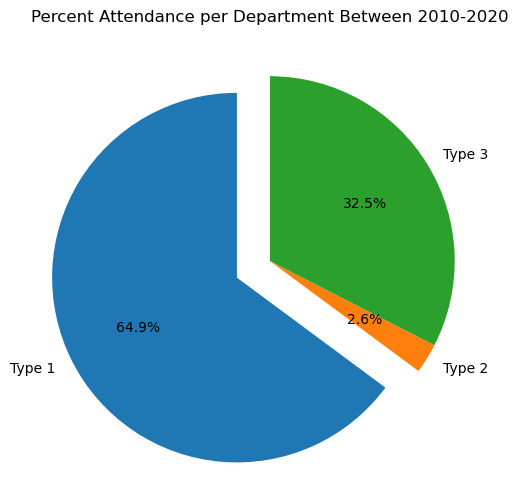

In [16]:
y = [type_1_percent,type_2_percent,type_3_percent]
mylabels = ["Type 1", "Type 2", "Type 3"]
myexplode = [0.2, 0, 0]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(y, labels=mylabels, autopct='%.1f%%', startangle = 90, explode = myexplode)

plt.title("Percent Attendance per Department Between 2010-2020")
plt.show() 

It is expected that type 1 and 3 departments will have more and a higher proportion of attendances as these represent hospital a&e services and urgent care centres respectively.

In [17]:
#New dataframe to aggregate attendance by year
year_aggregated = df_clean.groupby(['Year']).agg({'Type 1 Departments - Major A&E': 'mean',
                          'Type 2 Departments - Single Specialty':'mean',
                          'Type 3 Departments - Other A&E/Minor Injury Unit':'mean',
                          'Total attendances':'mean',
                          'Total attendances normalised':'mean'
                           })

#New column for percentage increase year-by-year
year_aggregated['percentage change of total attendances'] = round((year_aggregated['Total attendances'].pct_change()) * 100, 2)
year_aggregated

,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Total attendances normalised,percentage change of total attendances
Year,,,,,,
2010,3345.431341,150.332795,1490.366721,4986.130856,0.058266,NaN
2011,3404.194322,156.670662,1652.959621,5213.824606,0.060926,4.57
2012,3413.652985,150.858955,1629.535075,5194.047015,0.060695,-0.38
2013,4655.459797,205.832294,2253.701674,7114.993764,0.083142,36.98
2014,4784.620013,206.028450,2328.210268,7318.858731,0.085525,2.87
2015,5268.060073,221.701294,2590.297046,8080.058414,0.094420,10.40
2016,5256.538724,206.303114,2582.475606,8045.317444,0.094014,-0.43
2017,5320.319459,202.024280,2665.988554,8188.332293,0.095685,1.78
2018,5302.931982,197.203023,2902.803504,8402.938509,0.098193,2.62


N.B: The drop for the year 2020 is due to data for this year only consisting of January to June. A trend seen across the analyses in this project.

### Visualisations

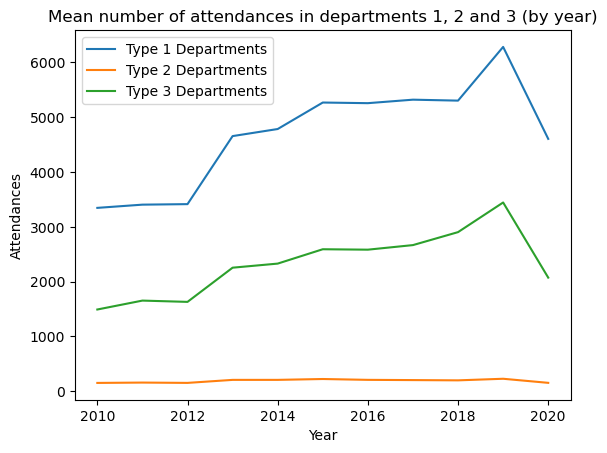

In [18]:
years_list = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]  

# Data points of line 1
x1 = years_list
y1 = year_aggregated['Type 1 Departments - Major A&E']

# Data points of line 2
x2 = years_list
y2 = year_aggregated['Type 2 Departments - Single Specialty']

# Data points of line 3
x3 = years_list
y3 = year_aggregated['Type 3 Departments - Other A&E/Minor Injury Unit']

# Plotting all lines with specifying labels
plt.plot(x1, y1, label='Type 1 Departments')
plt.plot(x2, y2, label='Type 2 Departments')
plt.plot(x3, y3, label='Type 3 Departments')

# Adding legend, x and y labels, and titles for the lines
plt.legend()
plt.xlabel('Year')
plt.ylabel('Attendances')
plt.title('Mean number of attendances in departments 1, 2 and 3 (by year)')
# Displaying the plot
plt.show()

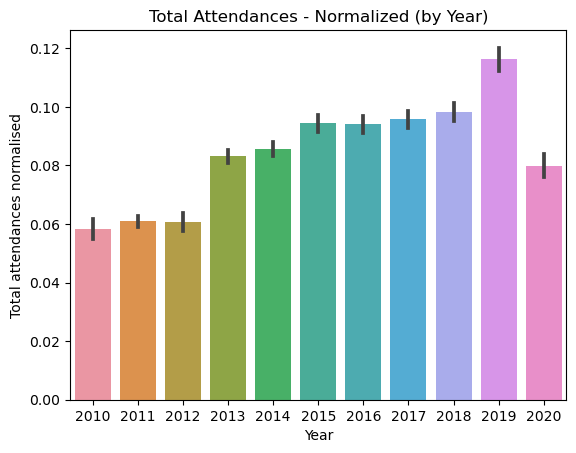

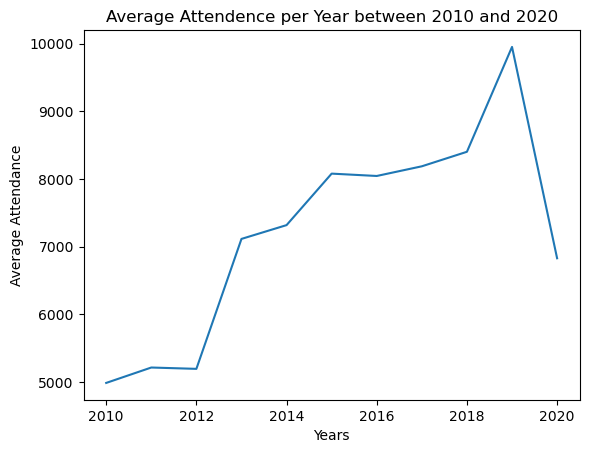

In [19]:
sns.barplot(x = df_clean['Year'], y=df_clean['Total attendances normalised']);
plt.title('Total Attendances - Normalized (by Year)')
plt.show()

# List of given years
years_list = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]  

# Extract dates and numbers from aggregation table
Years = years_list
Average_attendance = year_aggregated['Total attendances']

# Create the line graph
plt.plot(Years, Average_attendance)

# Customize the graph
plt.title('Average Attendence per Year between 2010 and 2020')
plt.xlabel('Years')
plt.ylabel('Average Attendance')

# Display the graph
plt.show()

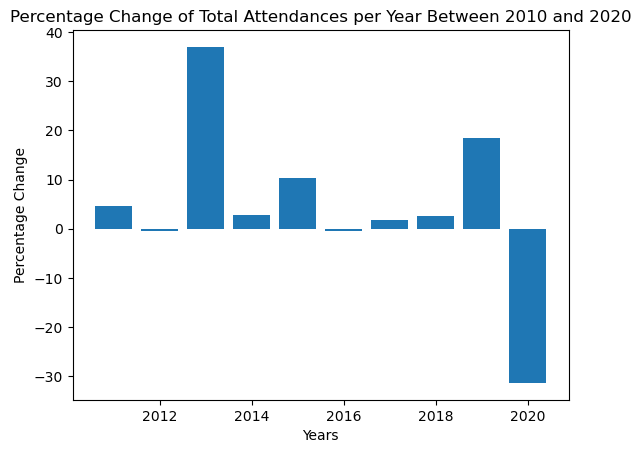

In [20]:
# List of given years
years_list = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]  

# Extract dates and numbers from aggregation table
Years = years_list
Percentage_change = year_aggregated['percentage change of total attendances']

# Create the line graph
plt.bar(Years, Percentage_change)

# Customize the graph
plt.title('Percentage Change of Total Attendances per Year Between 2010 and 2020')
plt.xlabel('Years')
plt.ylabel('Percentage Change')

# Display the graph
plt.show()

N.B, due to 2020 only being 6-months of data, this majorly skewed the data for that year.

## Exploring 4-hour targets across departments

In [21]:
#The percentage of each hospital type attendances that left ED within 4 hours of attending (as per target)

type_1_achieved_target = ((df_clean['Type 1 Departments - 4 hours to decision'].sum()) / type_1_total) * 100
print(f'{round(type_1_achieved_target,2)}% of type 1 department attendances achieved target of 4 hours to decision \
between 2010 and 2020.')

type_2_achieved_target = ((df_clean['Type 2 Departments - 4 hours to decision'].sum()) / type_2_total) * 100
print(f'{round(type_2_achieved_target,2)}% of type 2 department attendances achieved target of 4 hours to decision \
between 2010 and 2020.')

type_3_achieved_target = ((df_clean['Type 3 Departments - 4 hours to decision'].sum()) / type_3_total) * 100
print(f'{round(type_3_achieved_target,2)}% of type 3 department attendances achieved target of 4 hours to decision \
between 2010 and 2020.')

35.74% of type 1 department attendances achieved target of 4 hours to decision between 2010 and 2020.
33.06% of type 2 department attendances achieved target of 4 hours to decision between 2010 and 2020.
39.2% of type 3 department attendances achieved target of 4 hours to decision between 2010 and 2020.


In [22]:
#The percentage of admissions that achieved 4 hours to decision target across all hospital types


total_4_hour_decision = df_clean['Type 1 Departments - 4 hours to decision'].sum() + \
df_clean['Type 2 Departments - 4 hours to decision'].sum() + \
df_clean['Type 3 Departments - 4 hours to decision'].sum()

percentage_achieved_4hr = (total_4_hour_decision / df_clean['Total attendances'].sum()) * 100

print(f'{round(percentage_achieved_4hr,2)}% of all admissions achieved 4 hours to decision target.')

36.79% of all admissions achieved 4 hours to decision target.


In [23]:
#Creating a new aggregated dataframe for the mean of each department attendances by year, including the mean of
# 'Percentage in 4 hours or less (all)' by year.

achieved_4hr_aggregated = df_clean.groupby(['Year']).agg({ 'Type 1 Departments - 4 hours to decision': 'mean',
                          'Type 2 Departments - 4 hours to decision':'mean',
                          'Type 3 Departments - 4 hours to decision':'mean',
                           'Percentage in 4 hours or less (all)':'mean' })

achieved_4hr_aggregated.rename(columns={'Percentage in 4 hours or less (all)': 'Mean percentage in 4 hours or less (all)'}, \
                              inplace=True)
achieved_4hr_aggregated

,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Mean percentage in 4 hours or less (all)
Year,,,,
2010,185.546042,0.410339,2.303716,3.525949
2011,159.024290,0.592744,2.164669,3.430707
2012,231.556716,0.380597,2.717164,3.131798
2013,320.820151,0.814244,3.716771,4.020358
2014,399.244931,0.868869,5.981687,4.009937
2015,547.832061,1.556256,9.526718,2.507591
2016,853.169567,2.042989,15.555442,0.883781
2017,3641.255636,150.016996,2022.954908,0.878442
2018,4323.275163,194.304019,2879.479217,0.876473


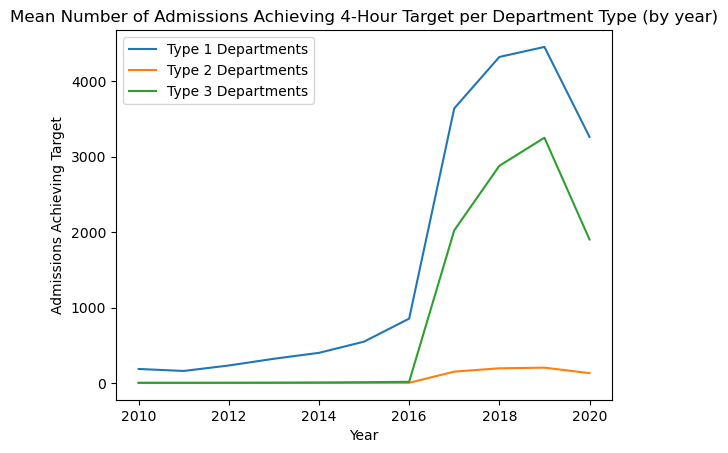

In [24]:
# Data points of line 1
x1 = years_list
y1 = achieved_4hr_aggregated['Type 1 Departments - 4 hours to decision']

# Data points of line 2
x2 = years_list
y2 = achieved_4hr_aggregated['Type 2 Departments - 4 hours to decision']

# Data points of line 3
x3 = years_list
y3 = achieved_4hr_aggregated['Type 3 Departments - 4 hours to decision']

# Plotting all lines with specifying labels
plt.plot(x1, y1, label='Type 1 Departments')
plt.plot(x2, y2, label='Type 2 Departments')
plt.plot(x3, y3, label='Type 3 Departments')

# Adding legend, x and y labels, and titles for the lines
plt.legend()
plt.xlabel('Year')
plt.ylabel('Admissions Achieving Target')
plt.title('Mean Number of Admissions Achieving 4-Hour Target per Department Type (by year)')

plt.show()

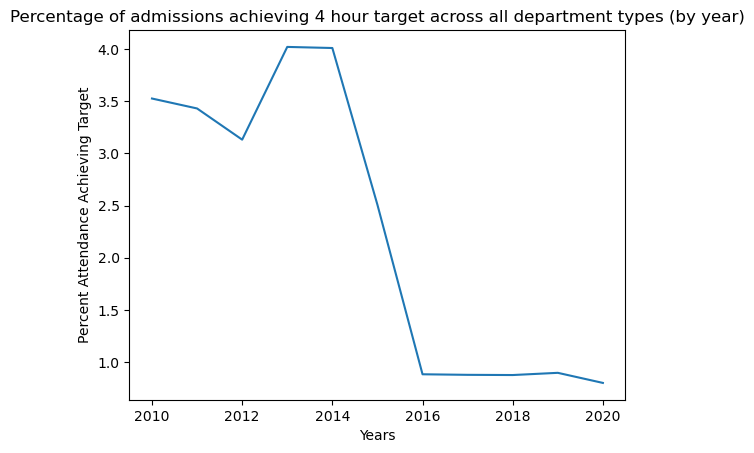

In [25]:
# List of given years
years_list = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]  

# Extract dates and numbers from aggregation table
Years = years_list
Percentage_achieved = achieved_4hr_aggregated['Mean percentage in 4 hours or less (all)']

# Create the line graph
plt.plot(Years, Percentage_achieved)

# Customize the graph
plt.title('Percentage of admissions achieving 4 hour target across all department types (by year)')
plt.xlabel('Years')
plt.ylabel('Percent Attendance Achieving Target')

# Display the graph
plt.show()

In [44]:
df_clean.head(1)

,date,Name,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission,Year,Month,Total attendances normalised
0,01/11/2010,Aintree University Hospitals NHS Foundation Trust,4622,0.0,0,4622.0,7,0,0,2.995435,1406,0,0,530,0,2010,1,0.05401


  Percentage of admissions achieving 4-hour target per department type (by year):

In [62]:
#Creating a dataframe which groups total of admissions achieving 4 hour target per department type by year AND 
#groups total of admissions per department type by year:
percentage_per_dept = df_clean.groupby(['Year']).agg({'Total attendances':'sum',
                          'Type 1 Departments - Major A&E':'sum',
                          'Type 2 Departments - Single Specialty':'sum',
                          'Type 3 Departments - Other A&E/Minor Injury Unit':'sum',
                        'Type 1 Departments - 4 hours to decision': 'sum',
                          'Type 2 Departments - 4 hours to decision':'sum',
                          'Type 3 Departments - 4 hours to decision':'sum',\
                           })

# Percentage of admissions achieving 4-hour target per department type (by year).

percentage_per_dept['Percent Type 1 Achieving 4-Hour Target'] = \
(percentage_per_dept['Type 1 Departments - 4 hours to decision'] \
 / type_1_total) * 100

percentage_per_dept['Percent Type 2 Achieving 4-Hour Target'] = \
(percentage_per_dept['Type 2 Departments - 4 hours to decision'] \
 / type_2_total) * 100

percentage_per_dept['Percent Type 3 Achieving 4-Hour Target'] = \
(percentage_per_dept[ 'Type 3 Departments - 4 hours to decision'] \
 / type_3_total) * 100

percentage_per_dept

,Total attendances,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percent Type 1 Achieving 4-Hour Target,Percent Type 2 Achieving 4-Hour Target,Percent Type 3 Achieving 4-Hour Target
Year,,,,,,,,,,
2010,3.086415e+06,2070822,93056.000000,922537,114853,254,1426,0.086988,0.004780,0.002153
2011,1.652782e+07,10791296,496646.000000,5239882,504107,1879,6862,0.381805,0.035362,0.010360
2012,6.960023e+06,4574295,202151.000000,2183577,310286,510,3641,0.235007,0.009598,0.005497
2013,2.167939e+07,14185186,627171.000000,6867029,977539,2481,11325,0.740377,0.046692,0.017098
2014,2.238107e+07,14631368,630035.000000,7119667,1220891,2657,18292,0.924689,0.050004,0.027616
2015,2.434522e+07,15872665,667986.000000,7804565,1650618,4689,28704,1.250159,0.088245,0.043335
2016,2.358083e+07,15406915,604674.428571,7569236,2500640,5988,45593,1.893956,0.112692,0.068833
2017,2.360696e+07,15338481,582436.000000,7686045,10497740,432499,5832179,7.950866,8.139487,8.805058
2018,2.446095e+07,15436835,574058.000000,8450061,12585054,565619,8382164,9.531773,10.644761,12.654865


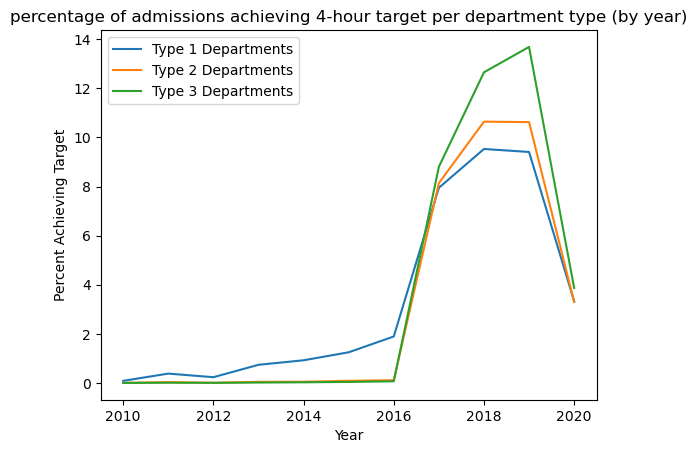

In [63]:
#Viz showing percentage of admissions achieving 4-hour target per department type (by year)

# Data points of line 1
x1 = years_list
y1 = percentage_per_dept['Percent Type 1 Achieving 4-Hour Target']

# Data points of line 2
x2 = years_list
y2 = percentage_per_dept['Percent Type 2 Achieving 4-Hour Target']

# Data points of line 3
x3 = years_list
y3 = percentage_per_dept['Percent Type 3 Achieving 4-Hour Target']

# Plotting all lines with specifying labels
plt.plot(x1, y1, label='Type 1 Departments')
plt.plot(x2, y2, label='Type 2 Departments')
plt.plot(x3, y3, label='Type 3 Departments')

# Adding legend, x and y labels, and titles for the lines
plt.legend()
plt.xlabel('Year')
plt.ylabel('Percent Achieving Target')
plt.title('percentage of admissions achieving 4-hour target per department type (by year)')

plt.show()

I calculated the percentage of admissions achieving the 4-hour target per department to complement the 'Mean percentage in 4 hours or less (all)' that originally came with the dataset. This highlighted some discrepencies in the data, which are apparent when comparing the visualisations for percentage of admissions achieving 4-hour target total and per department type. So I tested using the first row of the df:

The 'Total attendances' column, which in row 0 only contains attendances from Type 1 departments, has a value of 4622. The amount of attendances achieiving the 4 hour target (in type 1 departments, but also technically overall) is 7. This means only 0.15% actually achieved this target, compared to the 2.99% stated in the 'percentage in 4 hours or less(all)' column. There would have had to be around 138 attendances achieving the target to get the value of 2.99%.

I used this method to check 5 random rows using .sample(%) and this confirmed the error. 

This prompted me to make my own version of 'percentage in 4 hours or less(all)' column, by calculating the cumulative percent of all departments achieving the 4-hour target:

In [64]:
#Creating a column for the cumulative percentage of all attendances achieving 4-hour target (Using sum data)

percentage_per_dept['cumulative_percent_all_dept'] = percentage_per_dept[['Percent Type 1 Achieving 4-Hour Target',\
                                                                          'Percent Type 2 Achieving 4-Hour Target',\
                                                                          'Percent Type 3 Achieving 4-Hour Target']].sum(axis=1)

percentage_per_dept

,Total attendances,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percent Type 1 Achieving 4-Hour Target,Percent Type 2 Achieving 4-Hour Target,Percent Type 3 Achieving 4-Hour Target,cumulative_percent_all_dept
Year,,,,,,,,,,,
2010,3.086415e+06,2070822,93056.000000,922537,114853,254,1426,0.086988,0.004780,0.002153,0.093921
2011,1.652782e+07,10791296,496646.000000,5239882,504107,1879,6862,0.381805,0.035362,0.010360,0.427527
2012,6.960023e+06,4574295,202151.000000,2183577,310286,510,3641,0.235007,0.009598,0.005497,0.250102
2013,2.167939e+07,14185186,627171.000000,6867029,977539,2481,11325,0.740377,0.046692,0.017098,0.804166
2014,2.238107e+07,14631368,630035.000000,7119667,1220891,2657,18292,0.924689,0.050004,0.027616,1.002309
2015,2.434522e+07,15872665,667986.000000,7804565,1650618,4689,28704,1.250159,0.088245,0.043335,1.381740
2016,2.358083e+07,15406915,604674.428571,7569236,2500640,5988,45593,1.893956,0.112692,0.068833,2.075481
2017,2.360696e+07,15338481,582436.000000,7686045,10497740,432499,5832179,7.950866,8.139487,8.805058,24.895411
2018,2.446095e+07,15436835,574058.000000,8450061,12585054,565619,8382164,9.531773,10.644761,12.654865,32.831399


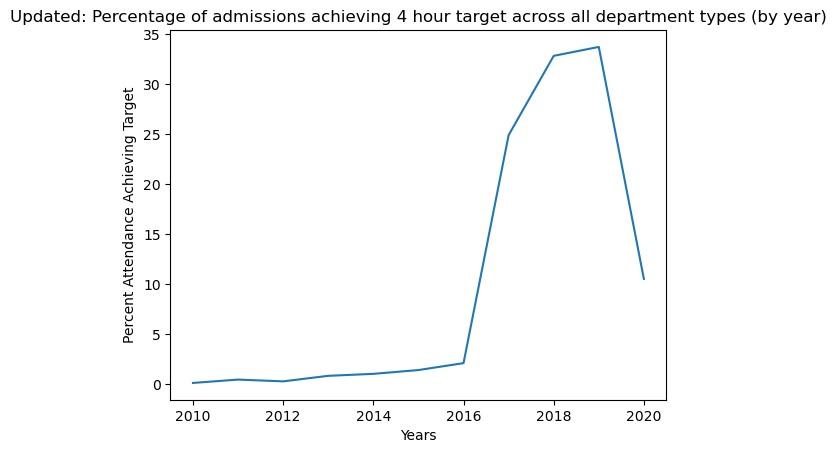

In [66]:
# List of given years
years_list = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]  

# Extract dates and numbers from aggregation table
Years = years_list
Total_percentage_achieved = percentage_per_dept['cumulative_percent_all_dept']

# Create the line graph
plt.plot(Years, Total_percentage_achieved)

# Customize the graph
plt.title('Updated: Percentage of admissions achieving 4 hour target across all department types (by year)')
plt.xlabel('Years')
plt.ylabel('Percent Attendance Achieving Target')

# Display the graph
plt.show()

## Exploring emergency admissions achieving 4-hour targets across departments

N.B. There is no total for emergency admissions so unable to determine what percentage of them achieved the 4 hour target.

In [29]:
#The % of emergency admissions from total amount of each hospital type attendances

type_1_emergency_admission_percentage = (df_clean['Emergency Admissions via Type 1 A&E in 4 hours'].sum() / type_1_total) * 100
print(f'{round(type_1_emergency_admission_percentage,2)}% of type 1 department emergency admissions were admitted to a hospital bed within 4 hours.')

type_2_emergency_admission_percentage = (df_clean['Emergency Admissions via Type 2 A&E in 4 hours'].sum() / type_2_total) * 100
print(f'{round(type_2_emergency_admission_percentage,2)}% of type 2 department emergency admissions were admitted to a hospital bed within 4 hours.')

type_3_emergency_admission_percentage = (df_clean['Emergency Admissions via Type 3 and 4 A&E in 4 hours'].sum() / type_3_total) * 100
print(f'{round(type_3_emergency_admission_percentage,2)}% of type 3 department emergency admissions were admitted to a hospital bed within 4 hours.')

27.98% of type 1 department emergency admissions were admitted to a hospital bed within 4 hours.
3.34% of type 2 department emergency admissions were admitted to a hospital bed within 4 hours.
0.61% of type 3 department emergency admissions were admitted to a hospital bed within 4 hours.


In [30]:
#Creating a dataframe which groups mean of emergency admissions achieving 4 hour target per department type by year
emergency_4hr_aggregated = df_clean.groupby(['Year']).agg({'Emergency Admissions via Type 1 A&E in 4 hours': 'mean',
                          'Emergency Admissions via Type 2 A&E in 4 hours':'mean',
                          'Emergency Admissions via Type 3 and 4 A&E in 4 hours':'mean',
                           })
emergency_4hr_aggregated

,Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours
Year,,,
2010,906.684976,17.949919,9.226171
2011,862.630284,9.115773,9.004101
2012,907.806716,7.840299,10.616418
2013,1233.488677,5.082048,9.103709
2014,1292.785154,5.389143,10.306736
2015,1446.596747,5.507136,17.024560
2016,1434.237120,4.597748,16.028659
2017,1502.375997,4.872355,15.623309
2018,1584.301615,6.026108,19.062178


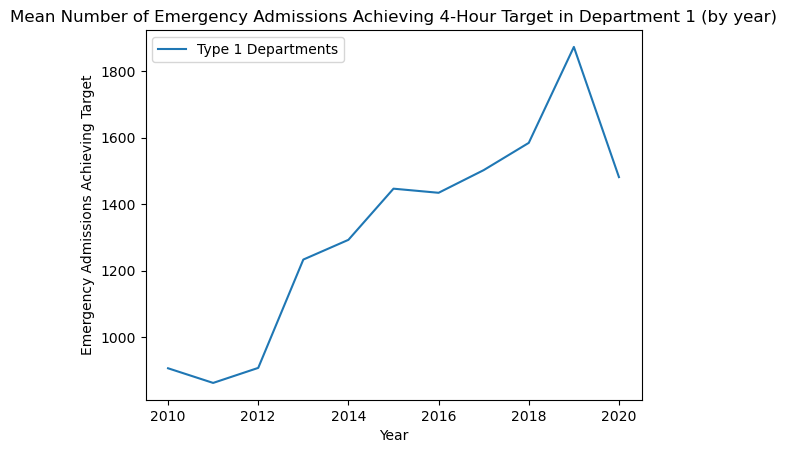

In [31]:
#For visibility purposes, the type 1 department data was separated into it's own plot due to the difference in y-axis values
# Data points of line 1
x1 = years_list
y1 = emergency_4hr_aggregated['Emergency Admissions via Type 1 A&E in 4 hours']

# Plotting all lines with specifying labels
plt.plot(x1, y1, label='Type 1 Departments')

# Adding legend, x and y labels, and titles for the lines
plt.legend()
plt.xlabel('Year')
plt.ylabel('Emergency Admissions Achieving Target')
plt.title('Mean Number of Emergency Admissions Achieving 4-Hour Target in Department 1 (by year)')
# Displaying the plot
plt.show()

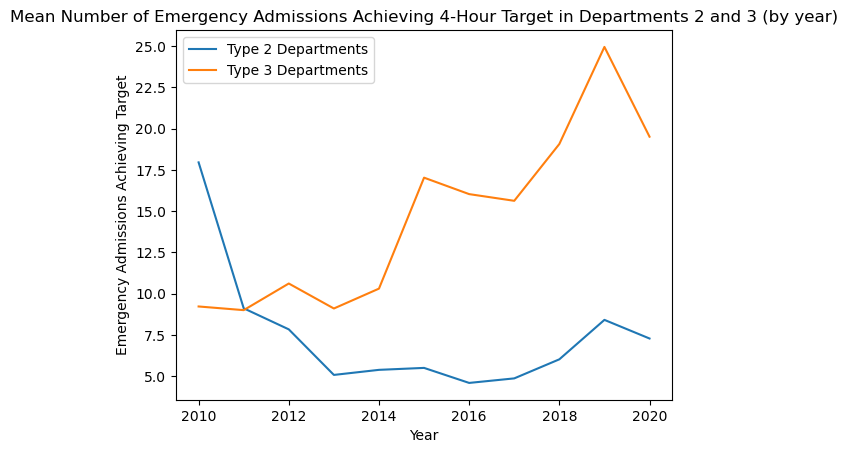

In [32]:
# Data points of line 1
x1 = years_list
y1 = emergency_4hr_aggregated['Emergency Admissions via Type 2 A&E in 4 hours']
# Data points of line 2
x2 = years_list
y2 = emergency_4hr_aggregated['Emergency Admissions via Type 3 and 4 A&E in 4 hours']
# Plotting all lines with specifying labels
plt.plot(x1, y1, label='Type 2 Departments')
plt.plot(x2, y2, label='Type 3 Departments')

# Adding legend, x and y labels, and titles for the lines
plt.legend()
plt.xlabel('Year')
plt.ylabel('Emergency Admissions Achieving Target')
plt.title('Mean Number of Emergency Admissions Achieving 4-Hour Target in Departments 2 and 3 (by year)')
# Displaying the plot
plt.show()

## Exploring percentage of patients spending >12hrs from decision-admit-admission compared to total attendances

In [33]:
#The percentage of patients spending >12hrs from decision-admit-admission compared to total attendances

percentage_12hr_of_total = (df_clean['Number of patients spending >12 hours from decision to admit to admission'].sum() / \
                            df_clean['Total attendances'].sum()) * 100

print(f'Only {round(percentage_12hr_of_total,2)}% of patients spent more than 12 hours from decision to admit to admission.')

Only 0.01% of patients spent more than 12 hours from decision to admit to admission.


In [34]:
#Creating a dataframe which groups mean of admissions achieving 4 hour target per department type by year
Over_12hrs_aggregated = df_clean.groupby(['Year']).agg({
    'Number of patients spending >12 hours from decision to admit to admission': 'mean'})
Over_12hrs_aggregated

,Number of patients spending >12 hours from decision to admit to admission
Year,
2010,0.019386
2011,0.020189
2012,0.020149
2013,0.084017
2014,0.127534
2015,0.441752
2016,0.887069
2017,0.968436
2018,1.394366


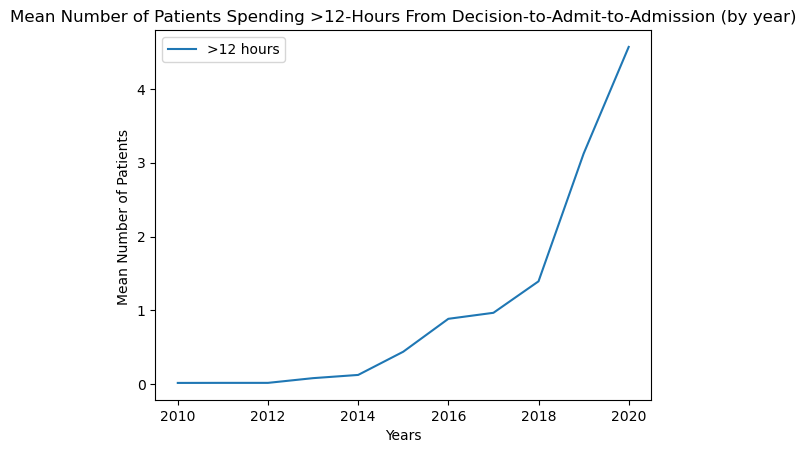

In [35]:
x1 = years_list
y1 = Over_12hrs_aggregated['Number of patients spending >12 hours from decision to admit to admission']

# Plotting all lines with specifying labels
plt.plot(x1, y1, label='>12 hours')

# Adding legend, x and y labels, and titles for the lines
plt.legend()
plt.xlabel('Years')
plt.ylabel('Mean Number of Patients ')
plt.title('Mean Number of Patients Spending >12-Hours From Decision-to-Admit-to-Admission (by year)')
# Displaying the plot
plt.show()

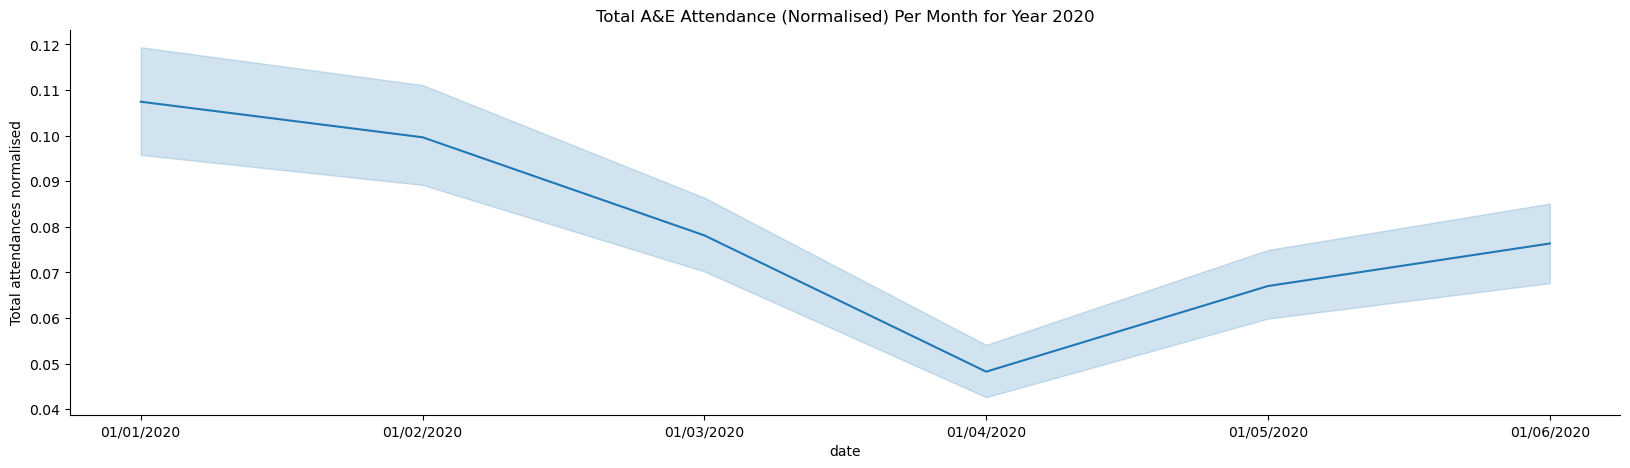

In [36]:
#Month-by-month total A&E attendance for year 2020
filtered_dates = df_clean.loc[df_clean['Year']==2020, 'date']
fig = plt.subplots(figsize=(20, 5))


sns.lineplot(x=filtered_dates, y=df_clean['Total attendances normalised'], data=df)
sns.despine()

plt.title('Total A&E Attendance (Normalised) Per Month for Year 2020')
plt.show()

There was a dramatic drop in the number of people accessing hospital care overall during March. As the data is from the 1st of every month, you can see a large dip between march and april, which continues to rise after April. 

The drop in hospital visits in March 2020 was a complex interplay of various factors related to the unique circumstances of the COVID-19 pandemic. Subsequent months saw efforts to adapt healthcare delivery to the new normal, with the gradual reintroduction of non-urgent services and increased emphasis on infection control measures within healthcare settings.
